In [43]:
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set_theme(style="whitegrid")

In [8]:
def tryn(x):
    try:
        return int(x)
    except:
        try:
            return float(x)
        except:
            return x

In [9]:
kenpom = {t["TeamName"]:{k:tryn(v) for k,v in t.items()} for t in csv.DictReader(open("kenpom23.csv"))}

In [10]:
kenpom

{'Abilene Christian': {'Season': 2023,
  'TeamName': 'Abilene Christian',
  'Tempo': 69.8901,
  'RankTempo': 82,
  'AdjTempo': 69.1696,
  'RankAdjTempo': 83,
  'OE': 101.304,
  'RankOE': 227,
  'AdjOE': 106.014,
  'RankAdjOE': 158,
  'DE': 106.206,
  'RankDE': 258,
  'AdjDE': 107.417,
  'RankAdjDE': 222,
  'AdjEM': -1.40295,
  'RankAdjEM': 192},
 'Air Force': {'Season': 2023,
  'TeamName': 'Air Force',
  'Tempo': 63.6234,
  'RankTempo': 346,
  'AdjTempo': 63.1398,
  'RankAdjTempo': 347,
  'OE': 104.037,
  'RankOE': 155,
  'AdjOE': 106.449,
  'RankAdjOE': 152,
  'DE': 104.358,
  'RankDE': 213,
  'AdjDE': 104.461,
  'RankAdjDE': 154,
  'AdjEM': 1.98799,
  'RankAdjEM': 143},
 'Akron': {'Season': 2023,
  'TeamName': 'Akron',
  'Tempo': 66.9744,
  'RankTempo': 232,
  'AdjTempo': 65.3036,
  'RankAdjTempo': 283,
  'OE': 109.675,
  'RankOE': 46,
  'AdjOE': 110.072,
  'RankAdjOE': 95,
  'DE': 101.219,
  'RankDE': 127,
  'AdjDE': 103.594,
  'RankAdjDE': 135,
  'AdjEM': 6.4781,
  'RankAdjEM': 104

In [23]:
# I just picked the higher kenpom seeds for the first four games
bracket={t["name"]:{k:tryn(v) for k,v in t.items()} for t in csv.DictReader(open("bracket.txt"))}
bracket['Arizona St.']

{'name': 'Arizona St.', 'seed': 11, 'region': 'west'}

In [44]:
teams=[]
for team in bracket:
    kteam = kenpom[team].copy()
    kteam['seed'] = bracket[team]['seed']
    kteam['region'] = bracket[team]['region']
    teams.append(kteam)
teams = pd.DataFrame.from_records(teams)
teams

,Season,TeamName,Tempo,RankTempo,AdjTempo,RankAdjTempo,OE,RankOE,AdjOE,RankAdjOE,DE,RankDE,AdjDE,RankAdjDE,AdjEM,RankAdjEM,seed,region
0,2023,Alabama,72.9291,10,72.7700,4,110.643,35,115.832,21,91.8275,5,88.8960,3,26.936300,3,1,south
1,2023,Texas A&M Corpus Chris,70.6680,53,69.2125,80,109.864,41,107.470,137,102.1440,147,107.6710,229,-0.201196,170,16,south
2,2023,Maryland,64.5455,335,64.5777,312,109.025,57,114.182,35,97.5818,61,95.8207,33,18.361200,22,8,south
3,2023,West Virginia,69.8826,84,68.8134,104,108.969,59,117.222,15,101.5110,134,98.0770,53,19.145000,17,9,south
4,2023,San Diego St.,66.5126,254,65.9638,251,106.670,99,112.035,64,95.1386,24,91.7542,10,20.280400,14,5,south
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2023,Kennesaw St.,69.1918,118,68.4905,119,105.334,134,106.391,153,101.3120,130,102.7780,117,3.612230,127,14,midwest
60,2023,Texas A&M,67.2917,216,66.1883,235,109.413,51,114.782,26,97.4788,57,95.9512,35,18.830300,19,7,midwest
61,2023,Penn St.,64.5470,334,64.4474,318,110.248,38,117.161,16,104.2860,209,102.3470,111,14.813900,43,10,midwest
62,2023,Texas,70.3477,66,69.0756,91,109.362,52,116.675,18,94.4193,18,92.1042,11,24.571300,7,2,midwest


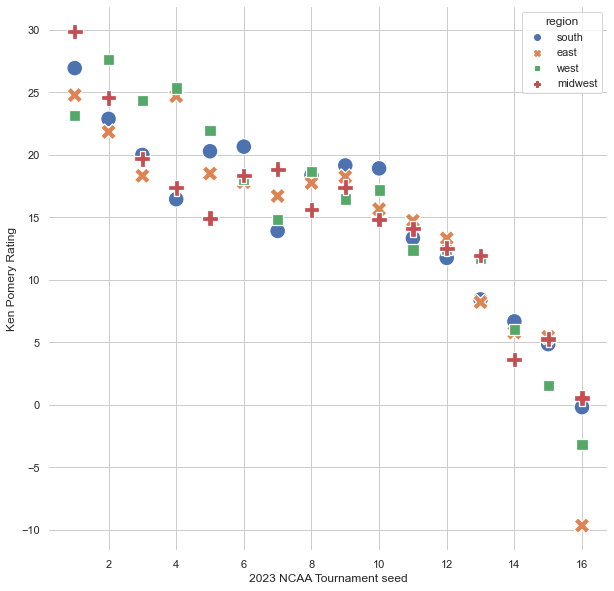

In [58]:
f, ax = plt.subplots(figsize=(10,10))
sns.despine(f, left=True, bottom=True)
ax.set(xlabel='2023 NCAA Tournament seed')
ax.set(ylabel= 'Ken Pomeroy Rating')
sns.scatterplot(x='seed', 
                y='AdjEM', 
                hue='region',
                style='region',
                data=teams,
                s=250,
                ax=ax)
None